<center><h1>Traitement d’images </h1></center>
<center><h3>TP 3 : morphologie mathématique-</h3> </center>
<center><h3> Application</h3></center>

<article style="padding:0px 150px ; align-text:justify">Dans  ce  TP,  nous  allons  pratiquer  des  transformations  morphologiques  sur  des  images. 
Fondamentalement, il existe deux transformations morphologiques de base : la dilatation et l'érosion. 
Elles sont présentes dans le traitement des images dans différentes applications. Elles sont utilisées pour 
supprimer  le  bruit  ou  pour  trouver  les  bosses  ou  les  trous  dans  les  images.  En  outre,  ces  opérations 
peuvent  également  être  utilisées  pour  calculer  les  gradients  des  images.  En  outre,  une  fois  que  nous 
avons appris les deux opérations morphologiques de base, nous pouvons les combiner pour créer des 
opérations supplémentaires telles que l'ouverture et la fermeture. </article>

In [1]:
# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Function to display images in Jupyter Notebooks
def display_image(title, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

1. Ouvrir ou acquérir une image couleur. Transformer cette image en image niveaux de 
gris.

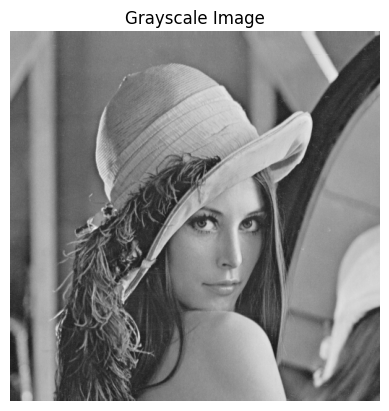

In [3]:
# 1. Load an image and convert to grayscale
img_color = cv2.imread('./lena_color.tif')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
display_image('Grayscale Image', img_gray)

2. Binariser l’image précédente de telle sorte à obtenir des objets en blanc et un fond en 
noir.

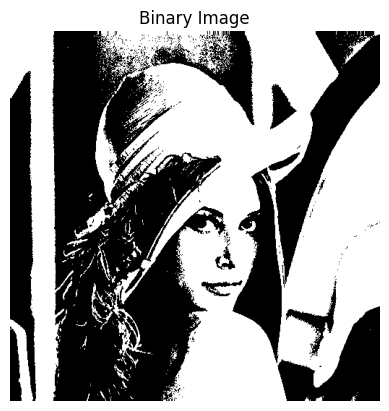

In [4]:
# 2. Binarize the image
_, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
display_image('Binary Image', img_binary)

-  Helper function to perform morphological operations

In [5]:
# Helper function to perform morphological operations
def apply_morphology(operation_name, binary_img, kernel_size, shape, iterations=1):
    kernel = cv2.getStructuringElement(shape, (kernel_size, kernel_size))
    if operation_name == 'erode':
        result = cv2.erode(binary_img, kernel, iterations=iterations)
    elif operation_name == 'dilate':
        result = cv2.dilate(binary_img, kernel, iterations=iterations)
    elif operation_name == 'open':
        result = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
    elif operation_name == 'close':
        result = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
    display_image(f'{operation_name.capitalize()} with {kernel_size}x{kernel_size}', result)

3. Appliquer une érosion sur l’image binaire en utilisant comme élément structurant un 
carré de taille 3×3 pixels. Commenter les résultats.

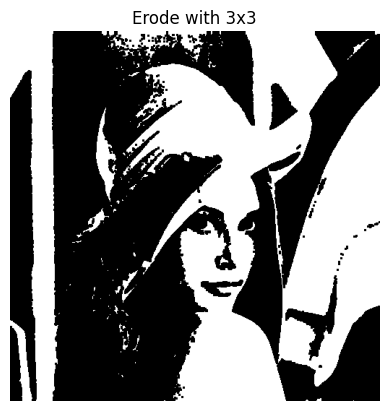

In [6]:
apply_morphology('erode', img_binary, 3, cv2.MORPH_RECT)

4. Appliquer une érosion sur l’image binaire en utilisant comme élément structurant un 
carré de taille 5×5 pixels. Commenter et comparer les résultats.  



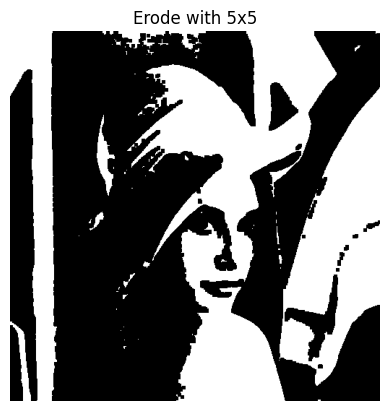

In [7]:
apply_morphology('erode', img_binary, 5, cv2.MORPH_RECT)

5. Appliquer deux érosions consécutivement sur l’image binaire en utilisant comme 
élément structurant un carré de taille 3×3 pixels. Commenter et comparer les résultats.  


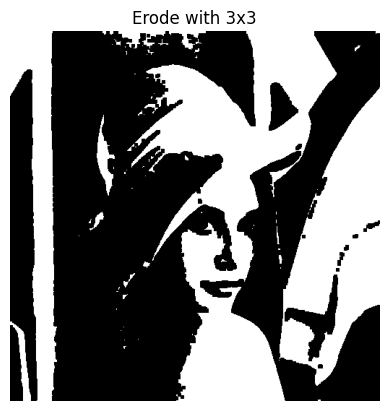

In [8]:
apply_morphology('erode', img_binary, 3, cv2.MORPH_RECT, iterations=2)

6. Appliquer une érosion sur l’image binaire en utilisant comme élément structurant un 
disque de taille 5×5 pixels. Commenter et comparer les résultats.  

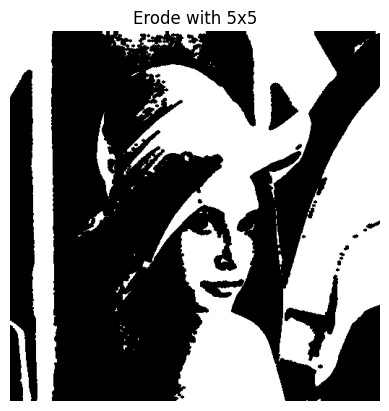

In [9]:
apply_morphology('erode', img_binary, 5, cv2.MORPH_ELLIPSE)

7. Appliquer une dilatation sur l’image binaire en utilisant comme élément structurant un 
carré de taille 3×3 pixels. Commenter les résultats.  


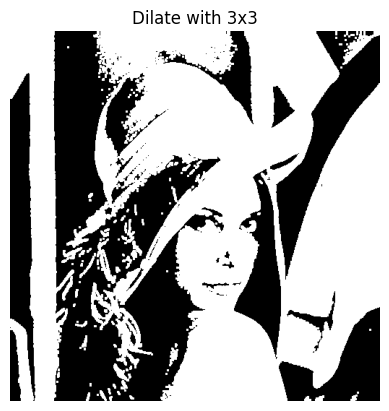

In [10]:
apply_morphology('dilate', img_binary, 3, cv2.MORPH_RECT)

8. Appliquer une dilatation sur l’image binaire en utilisant comme élément structurant un 
carré de taille 5×5 pixels. Commenter et comparer les résultats.  


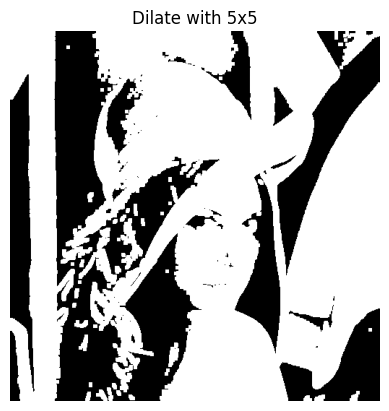

In [11]:
apply_morphology('dilate', img_binary, 5, cv2.MORPH_RECT)

9. Appliquer deux dilatations consécutivement sur l’image binaire en utilisant comme 
élément structurant un carré de taille 3×3 pixels. Commenter et comparer les résultats. 


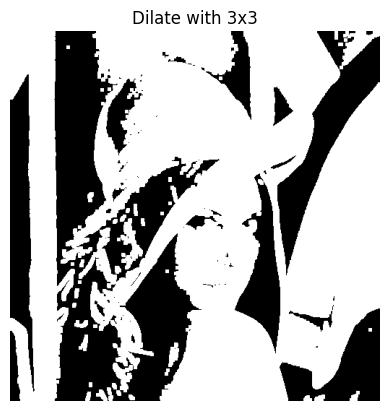

In [12]:
apply_morphology('dilate', img_binary, 3, cv2.MORPH_RECT, iterations=2)

10.  Appliquer une dilatation sur l’image binaire en utilisant comme élément structurant 
un disque de taille 5×5 pixels. Commenter et comparer les résultats. 

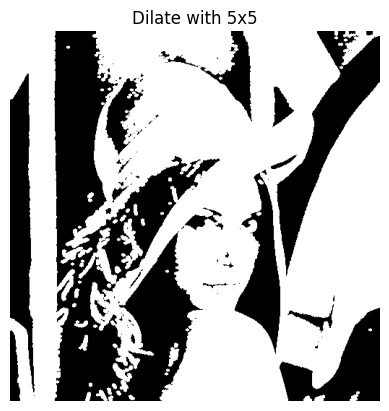

In [13]:
apply_morphology('dilate', img_binary, 5, cv2.MORPH_ELLIPSE)

<center><h2>Application </h2><center>  
Analyse qualitative de globules rouges à partir de l’observation microscopique d’échantillons 
sanguins. Cette analyse pourrait se faire à l’aide d’un traitement morphologique  des images 
issues d’un microscope :  
• Prendre l’image globules.tif 
• En utilisant des opérateurs morphologiques, imaginer et appliquer un algorithme 
permettant de segmenter les globules rouges de façon précise : l’algorithme devra 
éliminer les plaquettes (petites cellules foncées), les globules rouges qui sont coupés 
(qui touchent le bord), les globules rouges qui sont supérposés. 

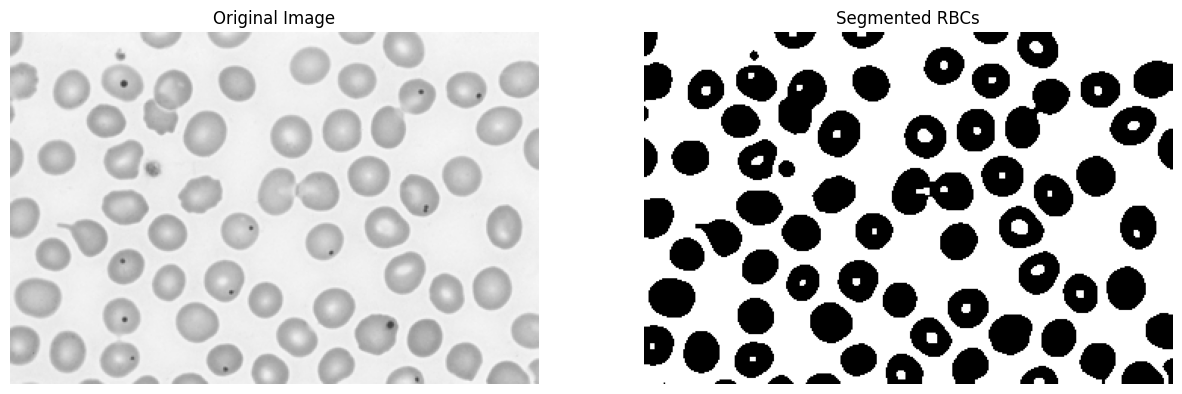

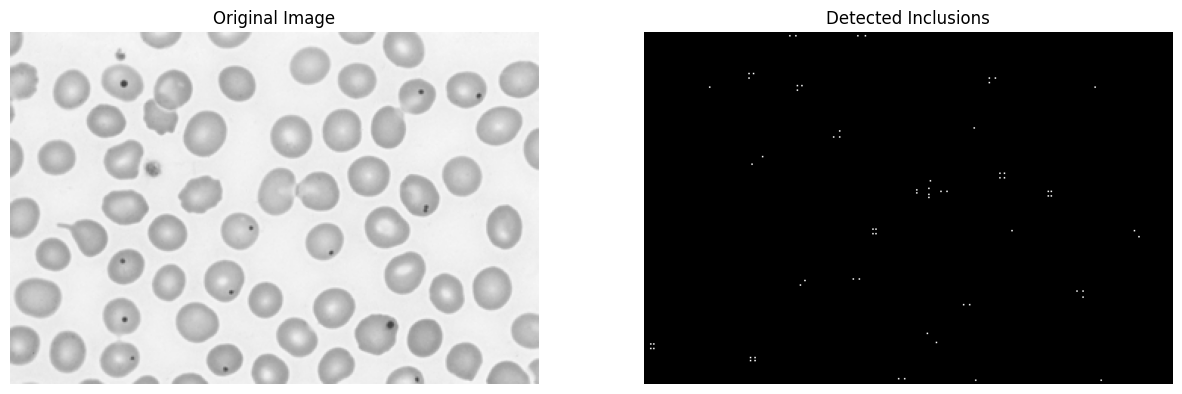

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def display_images(images, titles, cmap='gray'):
    """Helper function to display images side by side."""
    n = len(images)
    plt.figure(figsize=(15, 6))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load the image
image_path = 'globules.tif'  # Adjust the path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if original_image is None:
    raise FileNotFoundError(f"No image found at {image_path}")
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Noise reduction with median filter
denoised_image = cv2.medianBlur(gray_image, 5)

# Threshold using Otsu's method
_, binary_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological operations
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Remove cells touching the borders
cleared_image = cv2.copyMakeBorder(dilated_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=[0, 0, 0])
cleared_image = cv2.erode(cleared_image, kernel, iterations=1)
cleared_image = cv2.dilate(cleared_image, kernel, iterations=1)[1:-1, 1:-1]

# Detecting inclusions
inclusion_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opened_image = cv2.morphologyEx(cleared_image, cv2.MORPH_OPEN, inclusion_kernel)
inclusions = cv2.subtract(cleared_image, opened_image)

# Display results
display_images([cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), cleared_image],['Original Image', 'Segmented RBCs'])

display_images([cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), inclusions],['Original Image', 'Detected Inclusions'])

